# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Cryptocurrency Data

Cryptocurrency data is essential to backtest strategies that run on cryptocurrency assets. In this notebook, you will learn how to search for any cryptocurrency ticker and then get its historical data. To do this in Python, we will use the [cryptocompare](https://pypi.org/project/cryptocompare/) package.

The `cryptocompare` package requires an API key to run. You can create a free account on the [CryptoCompare](https://min-api.cryptocompare.com/pricing) website and create your API key from the [dashboard](https://www.cryptocompare.com/cryptopian/api-keys).

The notebook is divided into the following parts:

1. [Set API Key](#set)
1. [Fetch Tickers](#tickers)
1. [Historical Data](#historical)
1. [Plot the Data](#plot)

## Import Libraries

In [1]:
# Import library for cryptocompare data
import cryptocompare

# Import data manipulation library
import pandas as pd

# Import datetime package
from datetime import datetime

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Quantra function to fetch the cryptocompare API key
import sys
sys.path.append("..")
from data_modules.FMDA_quantra import get_cryptocompare_api

<a id='set'></a> 
## Set API Key

You will set the API key in the `cryptocompare` Python object. This object will be used to fetch data from [CryptoCompare](https://www.cryptocompare.com/).

In this notebook, the API keys are fetched using the `get_cryptocompare_api` function from the `FMDA_quantra.py` file. If you want to run this code on your local machine, then you must add your own API key in the `FMDA_quantra.py` file located inside the `data_modules` folder.

In [2]:
# Get the API key from the Quantra file located inside the data_modules folder
cryptocompare_API_key = get_cryptocompare_api()

# Set the API key in the cryptocompare object
cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_API_key)

print("API Key set!")

API Key set!


<a id='tickers'></a> 
## Fetch Tickers

All the cryptocurrency tickers are fetched from the cryptocompare database.

In [3]:
# Fetch the raw ticker list
raw_ticker_data = cryptocompare.get_coin_list()

# Convert the raw data from dictionary format to DataFrame
all_tickers = pd.DataFrame.from_dict(raw_ticker_data).T

# Preview the last 5 entries of the ticker list
all_tickers.tail()

,Algorithm,AssetTokenStatus,CoinName,ContentCreatedOn,Description,FullName,Id,ImageUrl,Name,ProofType,Rating,SortOrder,Sponsored,Symbol,Taxonomy,Url
KEI,N/A,N/A,Keisuke Inu,1622018895,Keisuke Inu (KEI) is a community-driven decent...,Keisuke Inu (KEI),941524,/media/37747649/kei.png,KEI,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",7133,False,KEI,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",/coins/kei/overview
FTM,N/A,Finished,Fantom,1546513175,FANTOM is a new DAG based Smart Contract platf...,Fantom (FTM),928158,/media/37747650/ftm.png,FTM,N/A,"{'Weiss': {'Rating': 'C-', 'TechnologyAdoption...",3808,False,FTM,"{'Access': 'Permissionless', 'FCA': 'Utility',...",/coins/ftm/overview
KAVA,N/A,N/A,Kava,1574169728,"Kava Chain is a decentralized, permissionless,...",Kava (KAVA),932609,/media/37747651/kava.png,KAVA,PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",4670,False,KAVA,"{'Access': 'Permissioned', 'FCA': 'Utility', '...",/coins/kava/overview
KALLY,N/A,N/A,Polkally,1622021686,Polkally is a P2P auction platform for NFTs ba...,Polkally (KALLY),941528,/media/37747652/kally.png,KALLY,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",7134,False,KALLY,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",/coins/kally/overview
MOOV,N/A,N/A,dotmoovs,1622022751,dotmoovs is a peer-to-peer competition platfor...,dotmoovs (MOOV),941530,/media/37747653/moov.png,MOOV,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",7135,False,MOOV,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",/coins/moov/overview


<a id='historical'></a> 
## Historical Data

You can fetch the historical data for the ticker symbol you want. The historical data in daily, hourly and minute frequency level are available.

Syntax: 
```python
# For daily data
cryptocompare.get_historical_price_day(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For hourly data
cryptocompare.get_historical_price_hour(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For minute data
cryptocompare.get_historical_price_minute(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)
```
Where
1. ticker_symbol: Ticker symbol whose data is required
1. currency: Currency in which the price is quoted
1. limit_value: The maximum number of bars to fetch (max. value is 2000)
1. exchange_name: The exchange to use when fetching the data
1. data_before_timestamp: Return the data before this timestamp (UNIX epoch time or a `datetime` object)

Returns:

A dictionary containing the historical data.

For illustration purpose, let's extract the hourly historical data for the `BTC` before 01-May-2021.

In [4]:
# Define the ticker symbol and other details
ticker_symbol = 'BTC'
currency = 'USD'
limit_value = 2000
exchange_name = 'CCCAGG'
data_before_timestamp = datetime(2021, 5, 1, 0, 0)

# Fetch the raw price data
raw_price_data = \
       cryptocompare.get_historical_price_hour(
                                                 ticker_symbol,\
                                                 currency,\
                                                 limit=limit_value,\
                                                 exchange=exchange_name,\
                                                 toTs=data_before_timestamp\
                                                )

# Convert the raw price data into a DataFrame
hourly_price_data = pd.DataFrame.from_dict(raw_price_data)

# Set the time columns as index and convert it to datetime
hourly_price_data.set_index("time", inplace=True)
hourly_price_data.index = pd.to_datetime(hourly_price_data.index, unit='s')

# Preview the first 5 values of the DataFrame
hourly_price_data.head()

,close,conversionSymbol,conversionType,high,low,open,volumefrom,volumeto
time,,,,,,,,
2021-02-06 10:00:00,40068.34,,direct,40070.36,39602.24,39932.73,3787.17,1.511222e+08
2021-02-06 11:00:00,40244.07,,direct,40502.54,40064.24,40068.34,4691.67,1.890053e+08
2021-02-06 12:00:00,39996.48,,direct,40501.21,39978.84,40244.07,2299.59,9.255233e+07
2021-02-06 13:00:00,40177.60,,direct,40307.54,39979.21,39996.48,1569.45,6.305513e+07
2021-02-06 14:00:00,40342.30,,direct,40602.44,40177.60,40177.60,2111.17,8.535130e+07


<a id='plot'></a> 
## Plot the Data

The `close` price is plotted for better visualisation.

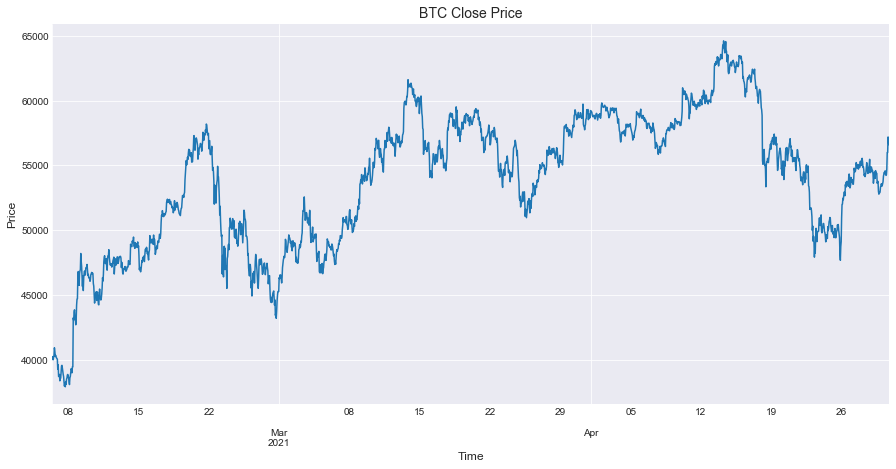

In [5]:
# Plot the close price
(hourly_price_data.close).plot(figsize=(15, 7))

# Set title and labels for the plot
plt.title('BTC Close Price', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

## Tweak the code
You can tweak the code in the following ways:

1. Try different cryptocurrency tickers.
1. Try different time-frequency.
<br><br>